<a href="https://colab.research.google.com/github/ShreyasShingare/TSF-Task1/blob/main/TSF_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Shreyas Shingare

Task : Predict the percentage of an student based on the no. of study hours.

In [36]:
# Import all libraries required
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [37]:
# get data from link

url = "http://bit.ly/w-data"    # we will provide link of the data to fetch it online
data = pd.read_csv(url)         # reading data in data variable
print("Data is imported...")

#alternatively, a local csv file containing the data can also be used, by giving path of the file

Data is imported...


In [38]:
#we will check the summary of the data for an overview

data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
# as we can see, there are two columns in the data, Hours and Scores.
# The mean value of Hours is 5.012 , and of Scores is 51.48
# The maximum value of Hours is 9.2 hours and maximum Scores is 95
# The minimum value of Hours is 1.1 hours and minimum value of Scores is 17

In [40]:
# We will take a look at the data itself

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


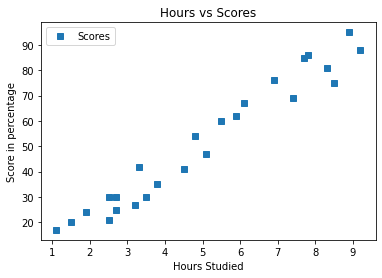

In [9]:
# We will plot the data using matplotlib, to see if there is any relation between the two columns

data.plot(x='Hours', y='Scores', style='s')    # 's' gives us square markers, other types of markers can be referred from matplotlib documentation
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score in percentage')  
plt.show()    

In [10]:
# As we can see, there is a linear relationship between the two columns. As the number of study hours increases, the scores increases

In [12]:
# We will split the data into train and test data for prediction

x = data.iloc[:, :-1].values  # here only first column is selected into x variable (all rows and 1st column)

y = data.iloc[:, 1].values    # here only 2nd column is selected into y variable (all rows and 2nd column)

from sklearn.model_selection import train_test_split  # here we are importing train test split function from scikit learn library for splitting our data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)   # test size=0.2 gives us 20% of the data as test data, 
                                                                                           # and remaining as training data.
                                                                                           # random state=0 means the data will not be shuffled before splitting

# Training

In [13]:
# we have splitted the data, now we have to train it using linear regression model

from sklearn.linear_model import LinearRegression    # we will import LinearRegression model from scikit learn 
linearRegression_model = LinearRegression()          
linearRegression_model.fit(x_train, y_train)         # here we will train the model on our data

print("Model is trained...")

Model is trained...


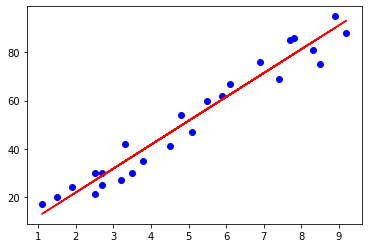

In [22]:
# we will plot the regression line, to be more clear about the trend in the data

line = linearRegression_model.coef_*x+linearRegression_model.intercept_      # this gives us the regression line

# Plotting for the test data
plt.scatter(x, y, color = 'blue')         # this gives us the plot of the two columns hours vs scores
plt.plot(x, line, color = 'red');        # this will combine the two plots, 'x' vs 'y' and regression line plot
plt.show()

# Predicting

In [31]:
# we have to make prediction using the test data we splitted earlier

y_pred = linearRegression_model.predict(x_test) # Predicting the scores
actual_prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    # we will compare the actual results with the ones predicted by our model
actual_prediction

print("model accuracy = ",linearRegression_model.score(x_test, y_test))        # printing the model accuracy on test data



model accuracy =  0.9454906892105354


In [ ]:
# as we can see, the predicted values are close to the actual ones abd accuracy is 94.5 %

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [34]:
# we will predict the score of the student, if he/she studies for 9.25 hours per day

print("Given 9.25 hours per day of study,")
print("Predicted Score = ", linearRegression_model.predict([[9.25]]))

Given 9.25 hours per day of study,
Predicted Score =  [93.69173249]


In [ ]:
# as we can see, the predicted score for a student who studies for 9.25 hours per day is 93.6917 %